**Test the Model Accuracy**

Import Necessary Libraries

In [44]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import requests
import numpy as np
from google.colab import files
from IPython.display import display, Javascript
import io
import ipywidgets as widgets

Set Raw Model URL

In [45]:
raw_model_url = 'https://raw.githubusercontent.com/22bayusetia/CerdasProject/main/Model_File/handwritten_trained.h5'

Download the Model File

In [46]:
# Downloading the model file
r = requests.get(raw_model_url, allow_redirects=True)
open('downloaded_model.h5', 'wb').write(r.content)

# Define the path to save the model file
model_path = 'handwritten_trained.h5'

Load the Pre-trained Model

In [47]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
loaded_model = load_model('downloaded_model.h5')

Upload Image for Prediction

FileUpload(value={}, accept='.png,.jpg,.jpeg', description='Upload Image')

1/1 [==============================] - 0s 20ms/step


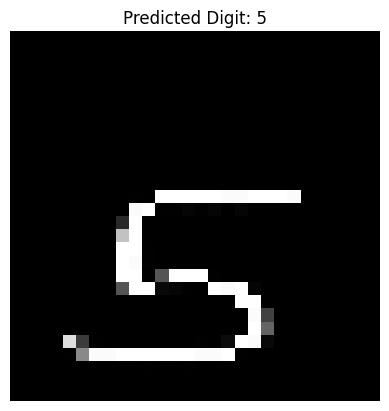

In [49]:
# Function to prepare the uploaded image for prediction
def prepare_uploaded_image(uploaded_file):
    img = tf.keras.preprocessing.image.load_img(uploaded_file, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)

# Function to handle file upload and prediction
def handle_file_upload(change):
    uploaded_file = io.BytesIO(list(upload_button.value.values())[0]['content'])
    new_image = prepare_uploaded_image(uploaded_file)
    predictions = loaded_model.predict(new_image)
    predicted_label = np.argmax(predictions)

    # Display the uploaded image and prediction
    plt.imshow(np.squeeze(new_image), cmap=plt.cm.binary)
    plt.title(f'Predicted Digit: {predicted_label}')
    plt.axis('off')
    plt.show()

    # Clear the output to avoid displaying the image twice
    upload_button.value.clear()

# Create a button for file upload
upload_button = widgets.FileUpload(accept='.png,.jpg,.jpeg', description='Upload Image')

# Display the upload button
display(upload_button)

# Handle the upload button's interaction
upload_button.observe(handle_file_upload, names='value')